In [65]:
#author=Paul Duckworth
#date=17sept2021

# Explore a patients data: CT Scan, Dose and available masks

In [1]:
import sys
import matplotlib.pyplot as plt

# primary_directory = '/content/drive/My Drive/open-kbp'
primary_directory = %pwd
sys.path.insert(0, primary_directory)

# Import provided classes and functions
import shutil
from provided_code.data_loader import DataLoader
from provided_code.dose_evaluation_class import EvaluateDose
from provided_code.general_functions import get_paths, make_directory_and_return_path
from provided_code.network_functions import PredictionModel

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
# Define parent directory
main_data_dir = '{}/provided-data'.format(primary_directory)
training_data_dir = '{}/train-pats'.format(main_data_dir)
validation_data_dir = '{}/validation-pats'.format(main_data_dir)
testing_data_dir = '{}/test-pats'.format(main_data_dir)

# Define hold out set
test_time = False  # Only change this to True when the model has been fully tuned on the validation set

# path where any data generated by this code (e.g., predictions, models) are stored
results_dir = '{}/results'.format(primary_directory)  # parent path where results are stored


In [4]:
# Prepare the data directory 
training_plan_paths = get_paths(training_data_dir, ext='')  # gets the path of each plan's directory

In [5]:
patient_list = []
patient_path_list = []

i = 10
pat_path = training_plan_paths[i]
print(i)

data_loader_train = DataLoader([training_plan_paths[i]])

# Get patient ID and location of processed data to load
patient_path_list.append(pat_path)
pat_id = pat_path.split('/')[-1].split('.')[0]
print(">",pat_id)
patient_list.append(pat_id)
# Make a dictionary of all the tensors
loaded_data_dict = data_loader_train.load_and_shape_data(pat_path)
    
#     for k in loaded_data_dict.keys()
#     print

10
> pt_58


## structure masks:

Brainstem.csv: mask of brainstem voxels; 
SpinalCord.csv: mask of spinal cord voxels; 
RightParotid.csv: mask of right parotid voxels; 
LeftParotid.csv: mask of left parotid voxels; 
Esophagus.csv: mask of esophagus voxels; 
Larynx.csv: mask of larynx voxels; 
Mandible.csv: mask of mandible voxels; 
PTV56.csv: A target that should receive 56 Gy; 
PTV63.csv: A target that should receive 63 Gy; 
PTV70.csv: A target that should receive 70 Gy; 

In [6]:
structure_masks = ["brainstem", "spinalcord", "rightparotid", "leftparotid", 
                    "esophagus", "larynx", "mandible", "PTV56", "PTV63", "PTV70"]

slice= 10


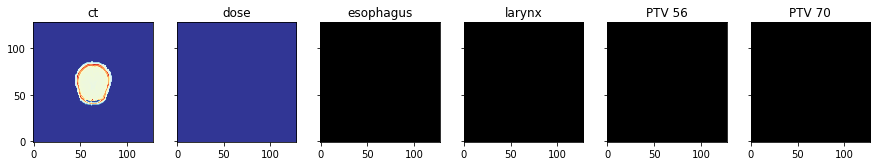

slice= 11


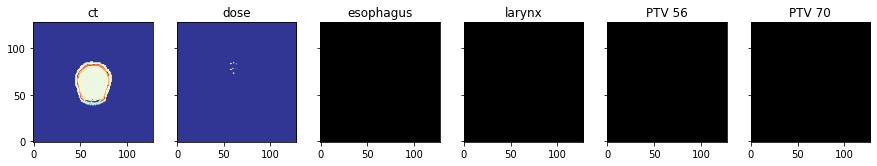

slice= 12


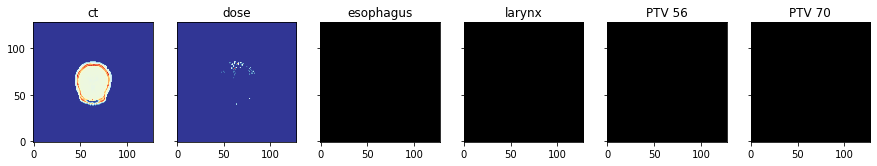

slice= 13


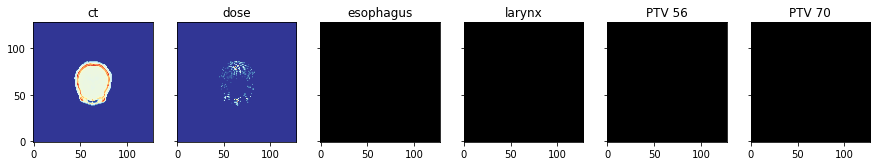

slice= 14


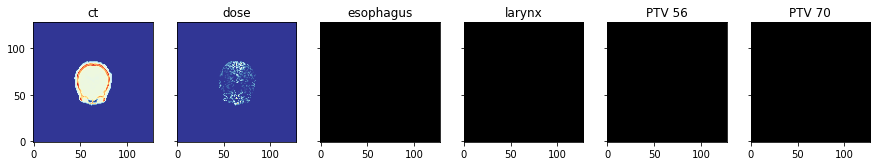

slice= 15


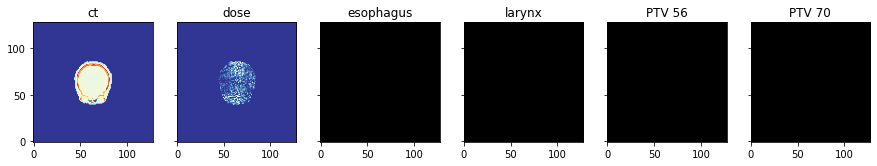

slice= 16


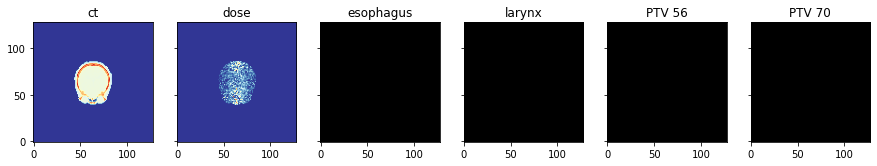

slice= 17


KeyboardInterrupt: 

In [12]:
for i in range(10, 100):
    print("slice=",i)
    fig, axes = plt.subplots(1, 6, figsize=(15,12),sharey=True)
#     for thing in ['ct', 'dose', 'st_mask_1', 'st_mask_2']:
#         slice = loaded_data_dict['dose'][:,:,i].squeeze()
               
    axes[0].imshow(loaded_data_dict['ct'][:,:,i].squeeze(), cmap='RdYlBu_r', origin="lower")
    axes[0].set_title('ct')
    axes[1].imshow(loaded_data_dict['dose'][:,:,i].squeeze(), cmap='RdYlBu_r', origin="lower")
    axes[1].set_title('dose')
    
    axes[2].imshow(loaded_data_dict['structure_masks'][:,:,i,4].squeeze(), cmap='gray', origin="lower")
    axes[2].set_title('esophagus')
    axes[3].imshow(loaded_data_dict['structure_masks'][:,:,i,5].squeeze(), cmap='gray', origin="lower")
    axes[3].set_title('larynx')
    
    
    axes[4].imshow(loaded_data_dict['structure_masks'][:,:,i,7].squeeze(), cmap='gray', origin="lower")
    axes[4].set_title('PTV 56')
    axes[5].imshow(loaded_data_dict['structure_masks'][:,:,i,9].squeeze(), cmap='gray', origin="lower")
    axes[5].set_title('PTV 70')
    plt.show()

## See some predictions:

  0%|          | 0/40 [00:00<?, ?it/s]

Predicting dose


  0%|          | 0/40 [00:00<?, ?it/s]

slice = 50


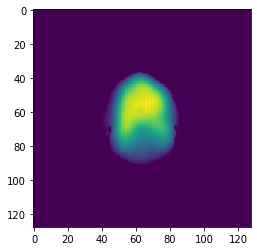

slice = 51


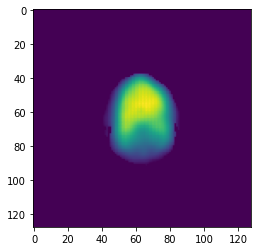

slice = 52


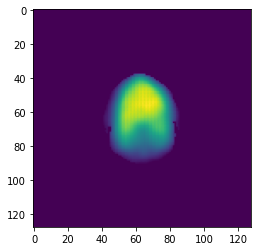

slice = 53


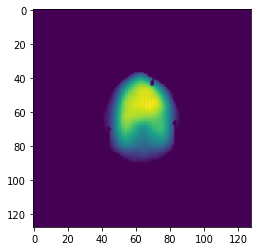

slice = 54


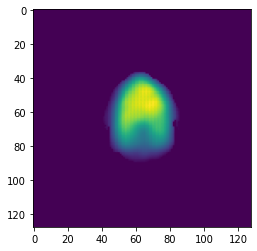

slice = 55


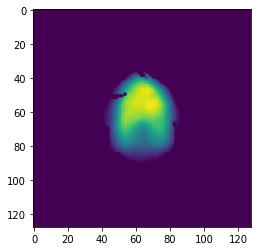

slice = 56


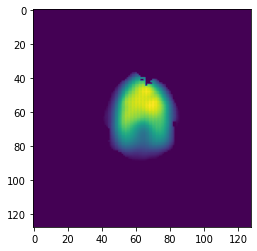

slice = 57


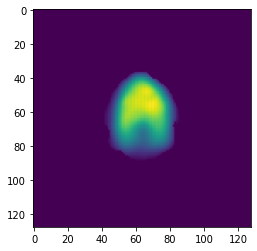

slice = 58


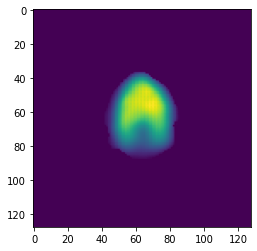

slice = 59


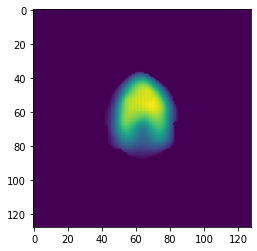

In [7]:
prediction_name = 'baseline'
number_of_training_epochs = 50

# Predict dose for the held out set
hold_out_plan_paths = get_paths(validation_data_dir, ext='')  # list of paths used for held out validation
stage_name = 'hold-out-validation'

data_loader_hold_out = DataLoader(hold_out_plan_paths, mode_name='dose_prediction')
dose_prediction_model_hold_out = PredictionModel(data_loader_hold_out, results_dir,
                                                 model_name=prediction_name, stage=stage_name)
dose_pred_gy = dose_prediction_model_hold_out.predict_dose(epoch=number_of_training_epochs)
dose_pred_gy = dose_pred_gy.squeeze()

for i in range(50, 60):
    print("slice = %s" %i)
    plt.imshow(dose_pred_gy[:,:,i])
    plt.show()